# NASA Asteroid Classification (XGBoost Classifier) by Chinmayee Nayak

# Content


The data is about Asteroids - NeoWs.
NeoWs (Near Earth Object Web Service) is a RESTful web service for near earth Asteroid information. With NeoWs a user can: search for Asteroids based on their closest approach date to Earth, lookup a specific Asteroid with its NASA JPL small body id, as well as browse the overall data-set.

Acknowledgements
Data-set: All the data is from the (http://neo.jpl.nasa.gov/). 
This API is maintained by SpaceRocks Team: David Greenfield, Arezu Sarvestani, Jason English and Peter Baunach.

Inspiration

Finding potential hazardous and non-hazardous asteroids

Features responsible for claiming an asteroid to be hazardous

# Importing necessary libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')  # Setting plot style to dark background for better visualization
import seaborn as sns # Seaborn is used for creating visualizations

# Reading CSV Data

In [36]:
df = pd.read_csv("E:\\Data Science\\space related project\\archive (13)\\nasa.csv")

In [37]:
# Displaying the first few rows of the DataFrame to understand its structure
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [38]:
# Checking the shape of the DataFrame (number of rows and columns)
df.shape

(4687, 40)

In [39]:
# Getting information about the DataFrame, including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

# Explanation:

 In this section, we import necessary libraries such as NumPy, Pandas, Matplotlib, and Seaborn. Then, we read the dataset from a CSV file into a Pandas DataFrame (df). We display the first few rows of the DataFrame, its shape (number of rows and columns), and information about its columns (data types and missing values).

# Dropping the column which are not useful in classification

In [40]:
# These columns contain unique identifiers and dates which are not relevant for classification
df = df.drop(['Neo Reference ID', 'Name', 'Orbit ID', 'Close Approach Date',
                        'Epoch Date Close Approach', 'Orbit Determination Date'] , axis = 1) # Dropping the specified columns from the DataFrame

df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


# One Hot Encoding of Hazardous Column

In [41]:
# Converting the 'Hazardous' column into binary labels (0 and 1) using one-hot encoding
hazardous_labels = pd.get_dummies(df['Hazardous']).astype(int)
hazardous_labels

,False,True
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
4682,1,0
4683,1,0
4684,1,0
4685,1,0


In [42]:
df = pd.concat([df, hazardous_labels], axis = 1) # Concatenating the encoded labels with the original DataFrame
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous,False,True
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True,0,1
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False,1,0
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True,0,1
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False,1,0
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True,0,1


In [43]:
df = df.drop(['Hazardous'], axis = 1) # Dropping the original 'Hazardous' column from the DataFrame
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,False,True
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,0,1
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,1,0
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,0,1
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,1,0
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,0,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Est Dia in M(min)             4687 non-null   float64
 4   Est Dia in M(max)             4687 non-null   float64
 5   Est Dia in Miles(min)         4687 non-null   float64
 6   Est Dia in Miles(max)         4687 non-null   float64
 7   Est Dia in Feet(min)          4687 non-null   float64
 8   Est Dia in Feet(max)          4687 non-null   float64
 9   Relative Velocity km per sec  4687 non-null   float64
 10  Relative Velocity km per hr   4687 non-null   float64
 11  Miles per hour                4687 non-null   float64
 12  Miss Dist.(Astronomical)      4687 non-null   float64
 13  Mis

# Explanation: 

Here, we preprocess the data by dropping columns that are not useful for classification, such as unique identifiers and dates. Then, we perform one-hot encoding on the 'Hazardous' column to convert it into binary labels (0 and 1), indicating non-hazardous and hazardous asteroids, respectively

# Observing Unique Values in Orbiting Body and Equinox¶

In [45]:
# Checking the unique values in the 'Orbiting Body' and 'Equinox' columns
df['Orbiting Body'].value_counts()

Orbiting Body
Earth    4687
Name: count, dtype: int64

In [46]:
df['Equinox'].value_counts()

Equinox
J2000    4687
Name: count, dtype: int64

# Only single unique value, so both can be dropped

In [47]:
# Since both 'Orbiting Body' and 'Equinox' columns contain only a single unique value, they can be dropped
df = df.drop(['Orbiting Body', 'Equinox'], axis = 1)

# Explanation: 

This section explores unique values in the 'Orbiting Body' and 'Equinox' columns. Since both columns contain only a single unique value, they are dropped as they do not provide useful information for classification.

# Heatmap of Correlation

<Axes: >

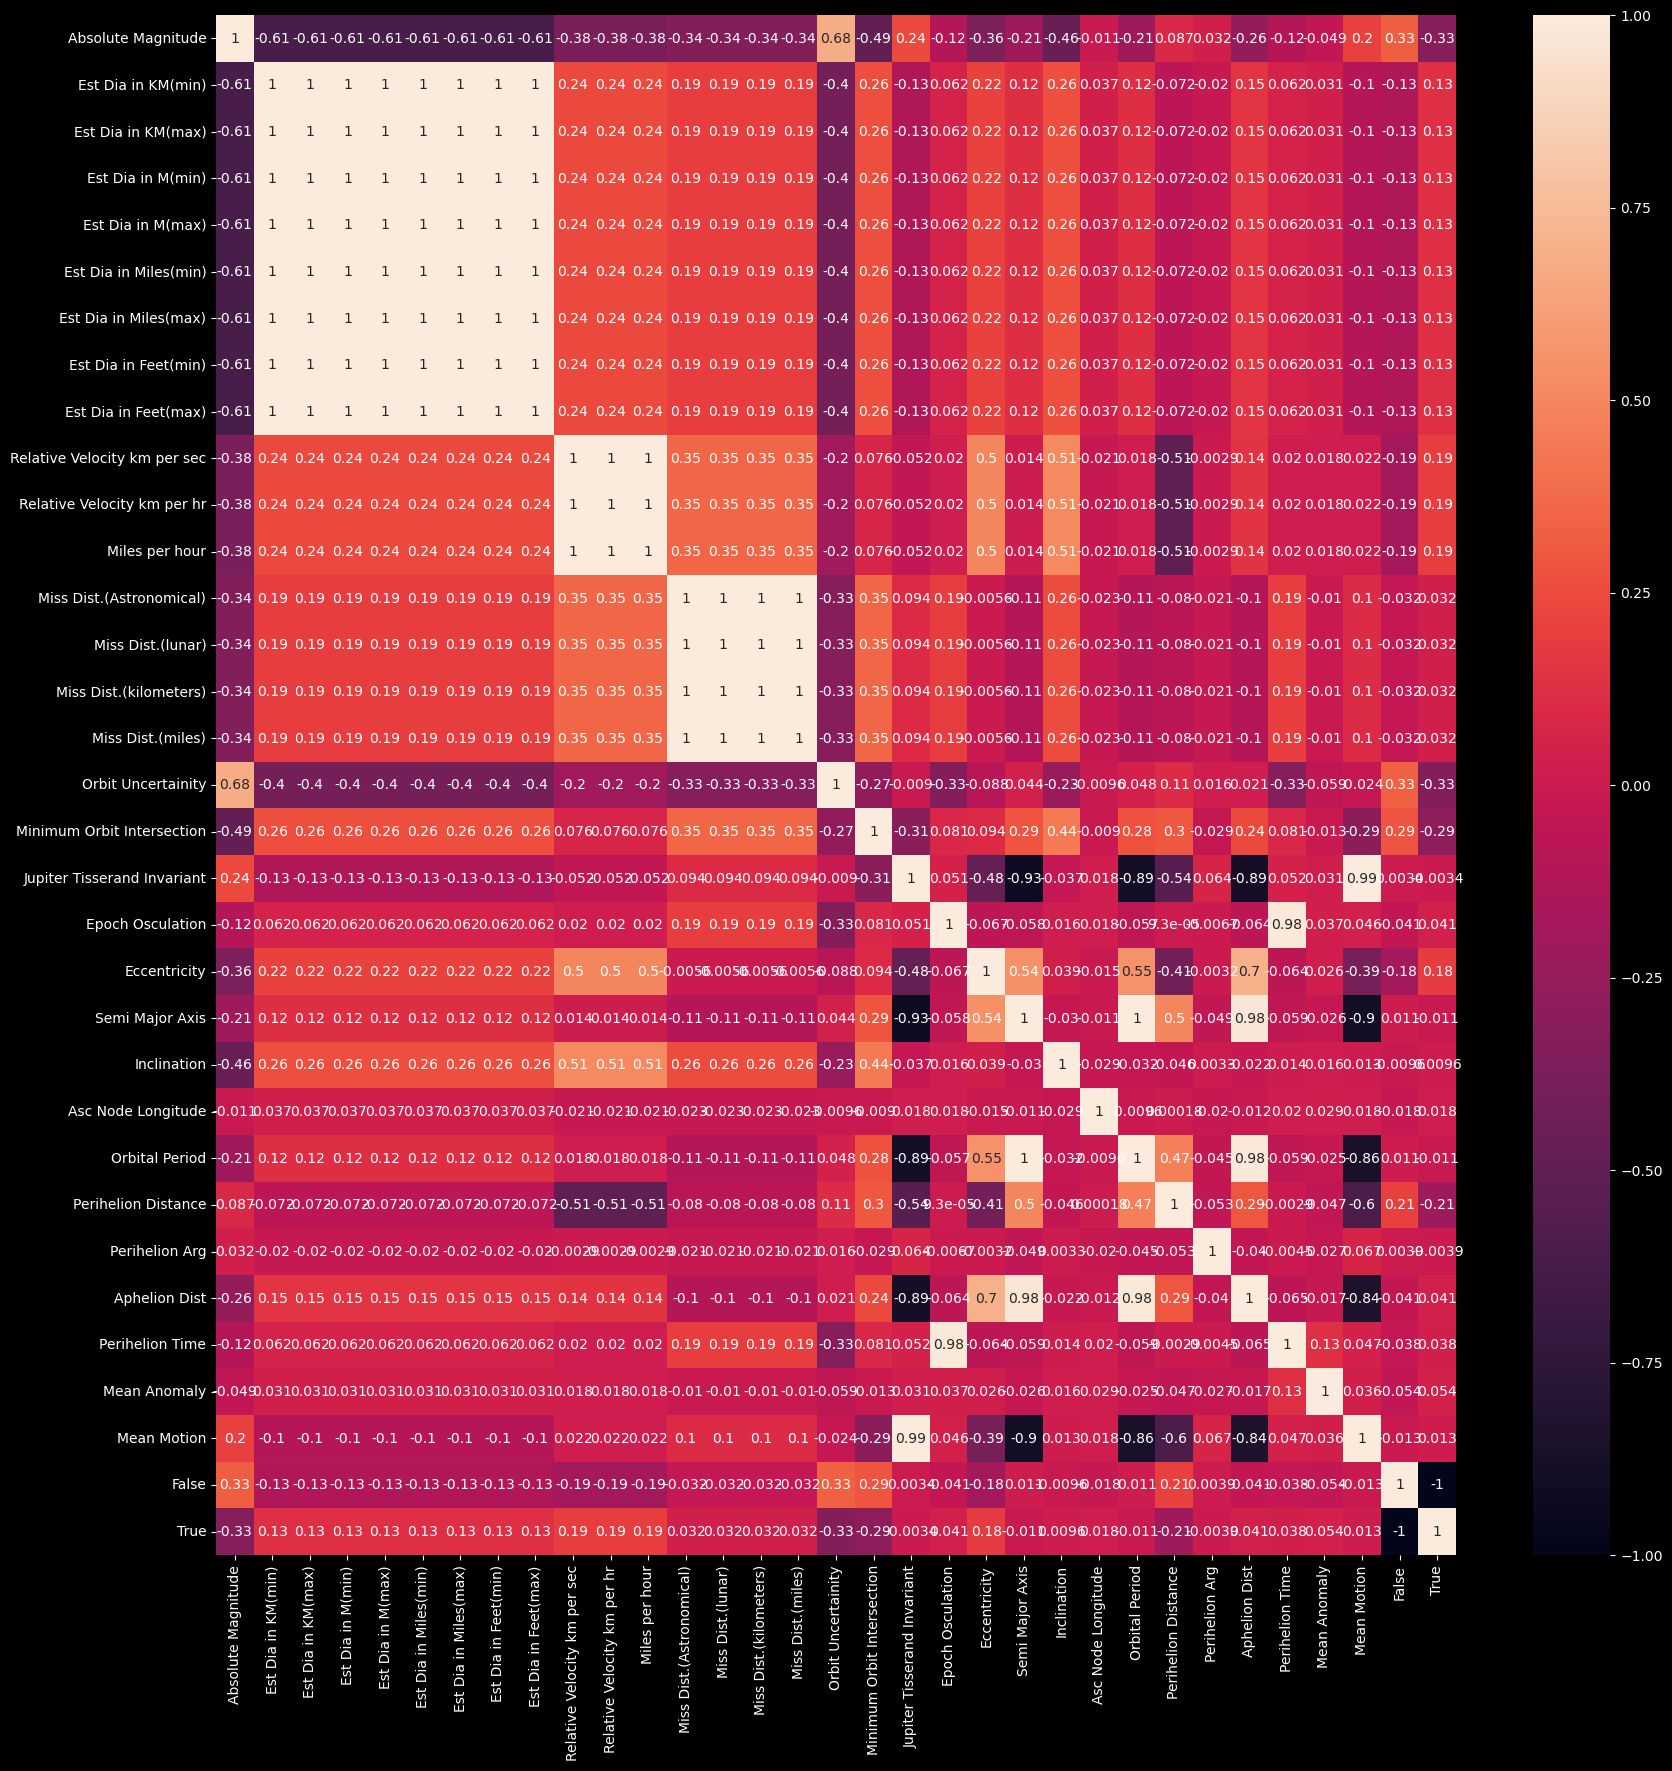

In [48]:
# Plotting a heatmap to visualize the correlation between different features in the dataset
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True) # annot=True to display correlation values on the heatmap

# Explanation: 

We plot a heatmap to visualize the correlation between different features in the dataset. This helps us understand the relationships between variables and identify potential correlations.

# Many Columns are there which are having correlation 1 because they are identical columns with a different unit. So, can be dropped.

In [49]:
# Dropping columns with correlation coefficient 1 as they are identical
df = df.drop(['Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)'
             ,'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 
             'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(lunar)', 
             'Miss Dist.(kilometers)', 'Miss Dist.(miles)'], axis = 1)
df.head()

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,False,True
0,21.6,0.127220,6.115834,0.419483,5,0.025282,4.634,2458000.5,0.425549,1.407011,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,0,1
1,21.3,0.146068,18.113985,0.383014,3,0.186935,5.457,2458000.5,0.351674,1.107776,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,1,0
2,20.3,0.231502,7.590711,0.050956,0,0.043058,4.557,2458000.5,0.348248,1.458824,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,0,1
3,27.4,0.008801,11.173874,0.285322,6,0.005512,5.093,2458000.5,0.216578,1.255903,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,1,0
4,21.6,0.127220,9.840831,0.407832,1,0.034798,5.154,2458000.5,0.210448,1.225615,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,0,1


# Explanation: 

Here, we identify and drop columns with a correlation coefficient of 1, as they represent identical information in different units.

# Final Heatmap

<Axes: >

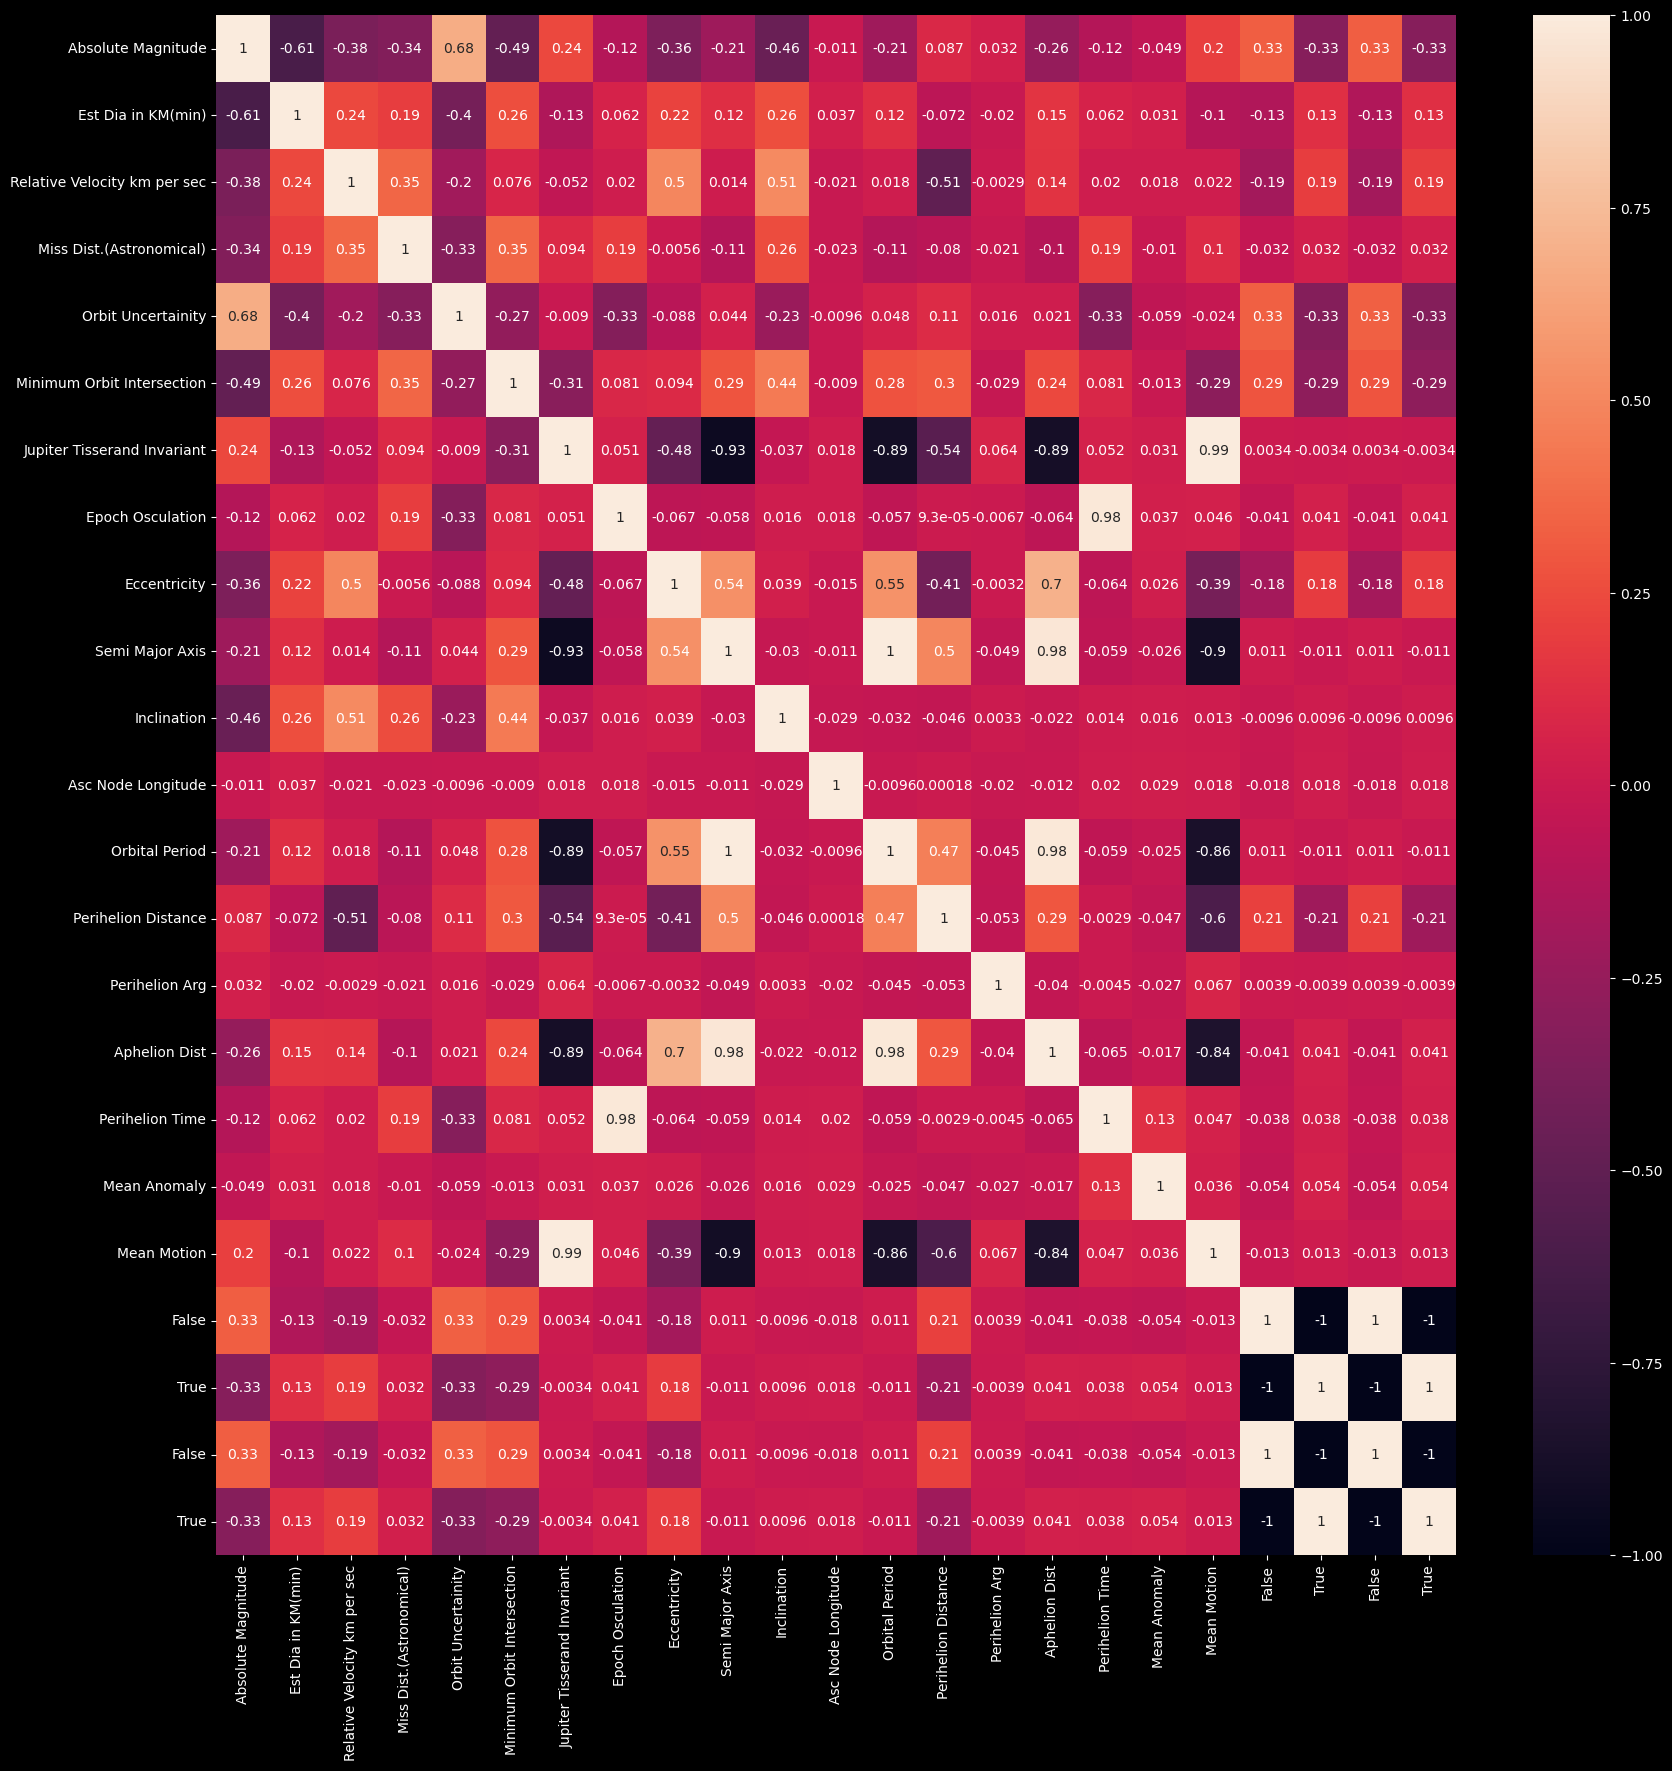

In [18]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True)

# Drop the False Column, True is enough for classification

In [50]:
# Since the True column indicates hazardous asteroids, we drop the False columnv
df.drop([False], axis = 1, inplace = True)

In [51]:
df.head()

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,True
0,21.6,0.127220,6.115834,0.419483,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,18.113985,0.383014,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,7.590711,0.050956,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,11.173874,0.285322,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,9.840831,0.407832,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


# Explanation:

As the 'True' column indicates hazardous asteroids, we drop the 'False' column as it is redundant for classification

In [52]:
# Displaying summary statistics of the DataFrame
df.describe()

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,True
count,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000
mean,22.267865,0.204604,13.970811,0.256778,3.516962,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242,0.161084
std,2.890972,0.369573,7.293223,0.145798,3.078307,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627,0.367647
min,11.160000,0.001011,0.335504,0.000178,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285,0.000000
25%,20.100000,0.033462,8.432865,0.133420,0.000000,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289,0.000000
50%,21.900000,0.110804,12.917889,0.265029,3.000000,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946,0.000000
75%,24.500000,0.253837,18.077649,0.384154,6.000000,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669,0.000000
max,32.100000,15.579552,44.633747,0.499884,9.000000,0.477891,9.025000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000,1.000000


# Model Building

In [54]:
# Splitting the data into features (X) and target variable (y)
x = df.drop([True], axis = 1) # Features (all columns except the True column)
y = df[True].astype(int) # Target variable (True column, converted to integers)


In [55]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0 , test_size = 0.3)

# Explanation:

In this section, we display summary statistics of the DataFrame, including mean, standard deviation, minimum, maximum, and quartile values. Then, we split the data into features (X) and the target variable (y), and further split it into training and testing sets using train_test_split from Scikit-Learn.

# XGBoost Classifier¶

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) ... A wide range of applications: Can be used to solve regression, classification, ranking, and user-defined prediction problems.

The XGBoost library provides a built-in function to plot features ordered by their importance.

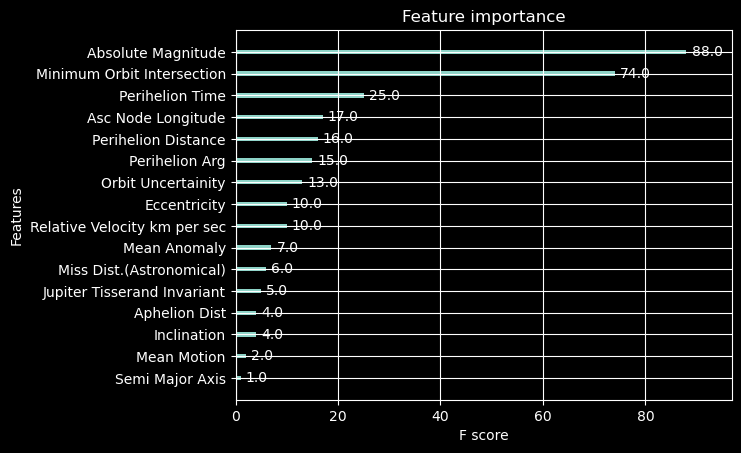

In [56]:
# XGBoost is a decision-tree-based ensemble Machine Learning algorithm
# It is used here as a classifier to predict whether an asteroid is hazardous or not
from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance

xbg_model = XGBClassifier()  # Initializing the XGBoost classifier model
xbg_model.fit(x_train, y_train) # Training the model on the training data

# Plotting feature importance to visualize the importance of each feature in the classification
plot_importance(xbg_model)
pyplot.show()

# Final Accuracy Score

In [57]:
# Evaluating the accuracy of the model on the test set
from sklearn.metrics import accuracy_score

predictions = xbg_model.predict(x_test) # Making predictions on the test set
acc = accuracy_score(y_test, predictions) # Calculating the accuracy score
print(str(np.round(acc*100, 2))+'%')

99.64%


# Explanation: 

Finally, we build an XGBoost classifier model, train it on the training data, and visualize the importance of each feature in the classification. We then evaluate the accuracy of the model on the test set and display the final accuracy score as a percentage.